## Alucar - Analisando as Vendas

In [26]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import matplotlib.pyplot as plt
import os.path

%matplotlib inline

In [2]:
ROOT_DIR = os.path.dirname(os.path.abspath( '.' ))
DATA_DIR = os.path.join(ROOT_DIR, 'data')
PROCESSED_DIR = os.path.join(DATA_DIR, 'processed')

In [3]:
alucar = pd.read_csv(os.path.join(PROCESSED_DIR, 'alucar.csv'))

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [6]:
print('Quantidade de Dados Nulos:', alucar.isnull().sum().sum())

Quantidade de Dados Nulos: 0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
print(sns.__version__)

0.9.0


### Gráficos

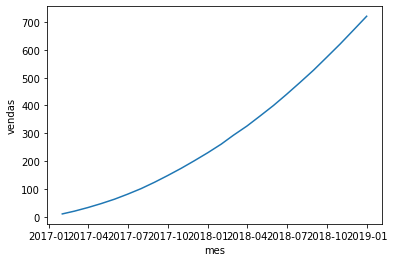

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar);


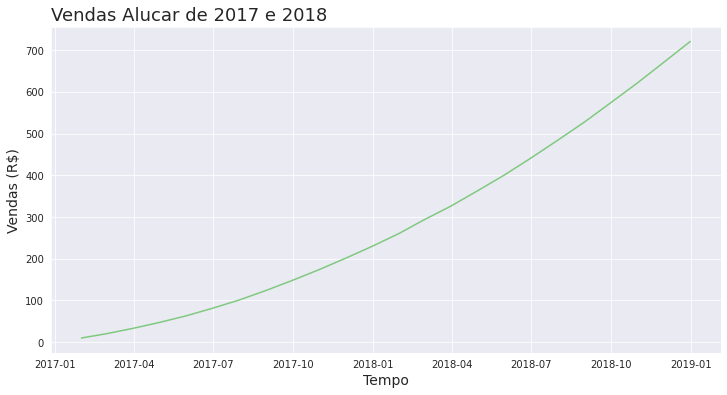

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14);

In [12]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Decomposição das Vendas

In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


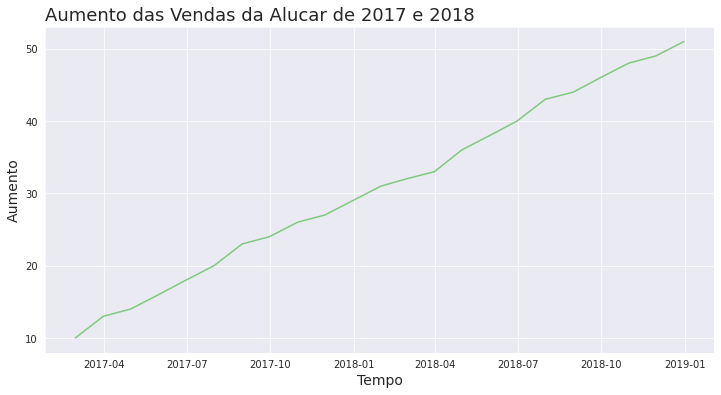

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14);

In [15]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14);

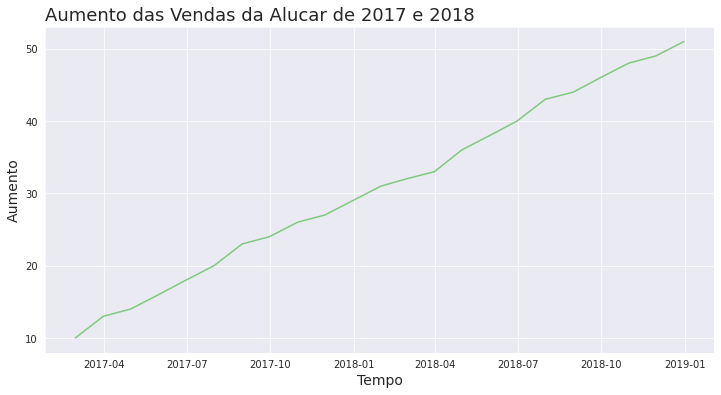

In [16]:
titulo = 'Aumento das Vendas da Alucar de 2017 e 2018'
labelx = 'Tempo'
labely = 'Aumento'
x = 'mes'
y = 'aumento'
dataset = alucar
plotar(titulo, labelx, labely, x, y, dataset)

In [17]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


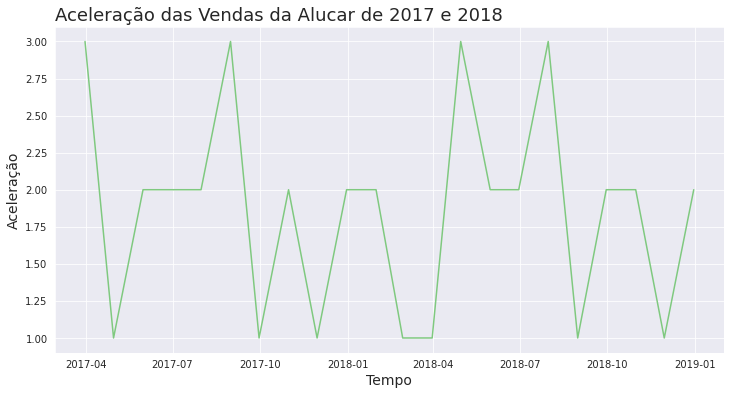

In [18]:
titulo = 'Aceleração das Vendas da Alucar de 2017 e 2018'
labelx = 'Tempo'
labely = 'Aceleração'
x = 'mes'
y = 'aceleracao'
dataset = alucar
plotar(titulo, labelx, labely, x, y, dataset)

### Observação e Tendência

In [23]:
def plot_comparacao(x, y1, y2, y3, dataset, title):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    sns.lineplot(x=x, y=y1, data=dataset)
    ax.set_title(title, fontsize=18, loc='left')

    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)

    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset);

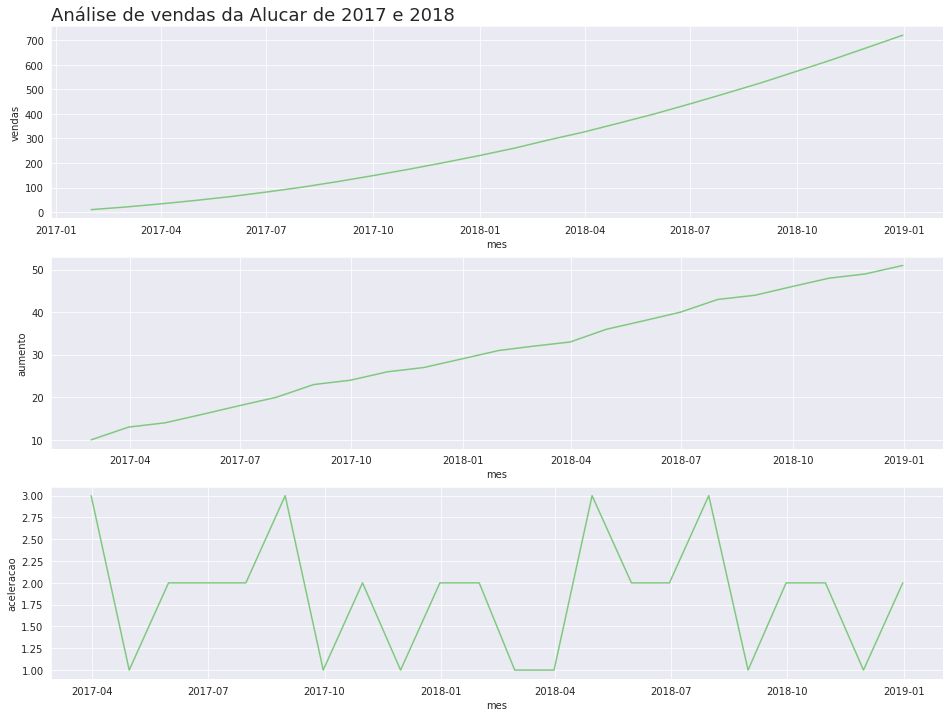

In [24]:
x = 'mes'
y1 = 'vendas'
y2 = 'aumento'
y3 = 'aceleracao'
title = 'Análise de vendas da Alucar de 2017 e 2018'
dataset = alucar
plot_comparacao(x, y1, y2, y3, dataset, title)

### Autocorrelação

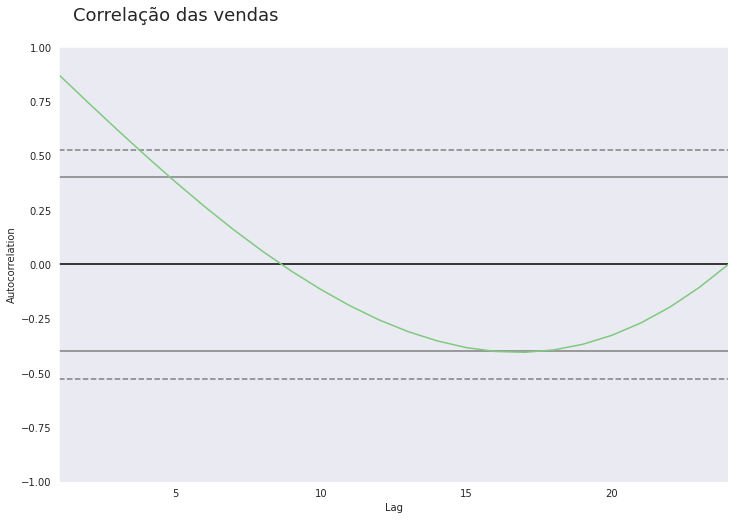

In [31]:
ax = plt.figure(figsize=(12,8))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas']);

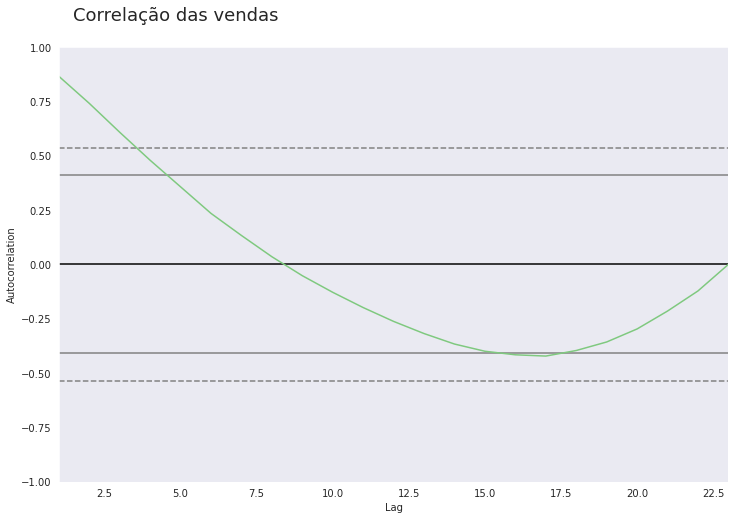

In [34]:
ax = plt.figure(figsize=(12,8))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:]);

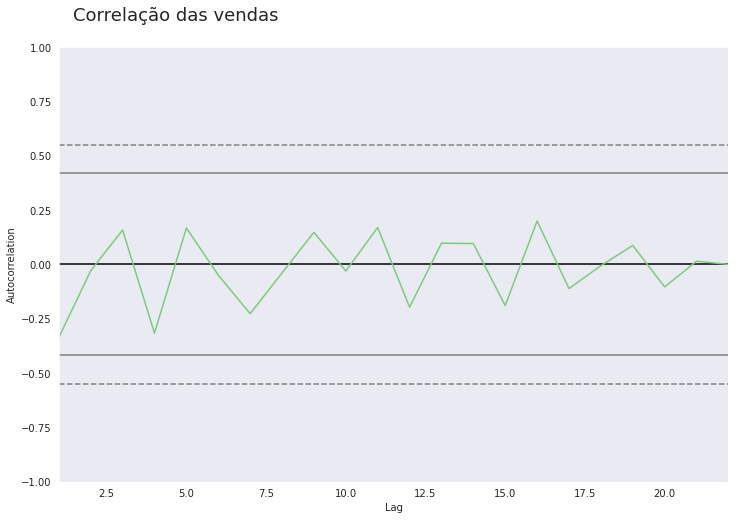

In [35]:
ax = plt.figure(figsize=(12,8))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:]);